# Проект 2. Разведывательный анализ данных

Задача  проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска

Описание датасета
Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

In [1]:
# Подключаем неоходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from scipy import stats
import statsmodels.api as sm
import statsmodels.api as sm
import scipy.stats as sst

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Загружаем исходные данные
studs= pd.read_csv('stud_math.csv')
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

### 1. Проведём первичную обработку данных.

In [3]:
display(studs)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [4]:
studs.info() # Смотрим информацию по колонкам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5]:
# Колонке 'studytime, granular' нет в описание к датасету, удоляем её, что бы не работать с непровереными данными.
studs.drop(['studytime, granular'], axis='columns', inplace=True)

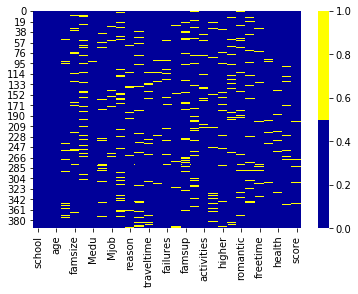

In [6]:
#  Визуализируем пропущенные значения с помощью тепловой карты.
colours = ['#000099', '#ffff00'] # определяем цвета, желтый - пропущенные данные, синий - не пропущенные 
sns.heatmap(studs.isnull(), cmap=sns.color_palette(colours))

In [7]:
# Составим список долей отсутствующих записей для каждого признака в процентах
for col in studs:
    pct_missing = np.mean(studs[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

school - 0.0%
sex - 0.0%
age - 0.0%
address - 4.0%
famsize - 7.0%
Pstatus - 11.0%
Medu - 1.0%
Fedu - 6.0%
Mjob - 5.0%
Fjob - 9.0%
reason - 4.0%
guardian - 8.0%
traveltime - 7.0%
studytime - 2.0%
failures - 6.0%
schoolsup - 2.0%
famsup - 10.0%
paid - 10.0%
activities - 4.0%
nursery - 4.0%
higher - 5.0%
internet - 9.0%
romantic - 8.0%
famrel - 7.0%
freetime - 3.0%
goout - 2.0%
health - 4.0%
absences - 3.0%
score - 2.0%


In [8]:
#  То же, но в реальном выражение
pd.isnull(studs).sum()

school         0
sex            0
age            0
address       17
famsize       27
Pstatus       45
Medu           3
Fedu          24
Mjob          19
Fjob          36
reason        17
guardian      31
traveltime    28
studytime      7
failures      22
schoolsup      9
famsup        39
paid          40
activities    14
nursery       16
higher        20
internet      34
romantic      31
famrel        27
freetime      11
goout          8
health        15
absences      12
score          6
dtype: int64

In [9]:
# Удоляем строки с пустыми значениями в колонке 'score'
studs.dropna(subset=['score'], inplace=True)

In [10]:
# Преоброзуем тип колонки  "traveltime","studytime", "famrel",	"freetime",	"goout", "Medu" и "Fedu" (образование родителей) в category,
# т.к. значения в них котегориальные
studs[["traveltime", "studytime", "famrel", "freetime", "goout", "Medu", "Fedu", "health", 'failures']] = studs[[
    "traveltime", "studytime", "famrel", "freetime", "goout", "Medu", "Fedu", "health", 'failures']].astype('category')

In [11]:
studs.describe()

,age,absences,score
count,389.000000,378.000000,389.000000
mean,16.673522,7.320106,52.262211
std,1.265662,23.615525,22.919022
min,15.000000,0.000000,0.000000
25%,16.000000,0.000000,40.000000
50%,17.000000,4.000000,55.000000
75%,18.000000,8.000000,70.000000
max,22.000000,385.000000,100.000000


In [12]:
# Заменим значения yes/no в колонках romantic,  internet, higher, nursery, activities, paid,  famsup, schoolsup на 1 если yes и 0 если no
studs['romantic'] = studs['romantic'].apply(lambda x: 1 if x == 'yes' else 0)
studs['internet'] = studs['internet'].apply(lambda x: 1 if x == 'yes' else 0)
studs['higher'] = studs['higher'].apply(lambda x: 1 if x == 'yes' else 0)
studs['nursery'] = studs['nursery'].apply(lambda x: 1 if x == 'yes' else 0)
studs['activities'] = studs['activities'].apply(lambda x: 1 if x == 'yes' else 0)
studs['paid'] = studs['paid'].apply(lambda x: 1 if x == 'yes' else 0)
studs['famsup'] = studs['famsup'].apply(lambda x: 1 if x == 'yes' else 0)
studs['schoolsup'] = studs['schoolsup'].apply(lambda x: 1 if x == 'yes' else 0)                      

In [13]:
studs['sex'] = studs['sex'].apply(lambda x: 1 if x == 'M' else 0)   

In [14]:
studs

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,0,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,1,0,0,0,1,1,0,0,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,0,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,0,1,0,0,0,1,1,0,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,0,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,1,0,0,0,1,1,1,0,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,0,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,0,1,1,1,1,1,1,1,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,0,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,0,1,1,0,1,1,0,0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,1,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,0,1,1,0,1,1,0,0,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,1,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,0,0,0,0,0,1,1,0,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,1,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,0,0,0,0,0,0,0,0,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,1,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,0,0,0,0,0,1,1,0,4.0,4.0,1.0,5.0,0.0,50.0


In [15]:
# Преоброзуем тип колонки  'sex', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic' в category,
# т.к. значения в них котегориальные
studs[['sex', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']] = studs[[
    'sex', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']].astype('category')

In [16]:
# Смотрим статистику по числовым признакам 
studs.describe()

,age,absences,score
count,389.000000,378.000000,389.000000
mean,16.673522,7.320106,52.262211
std,1.265662,23.615525,22.919022
min,15.000000,0.000000,0.000000
25%,16.000000,0.000000,40.000000
50%,17.000000,4.000000,55.000000
75%,18.000000,8.000000,70.000000
max,22.000000,385.000000,100.000000


In [17]:
# Смотрим статистику по не числовым признакам 
studs.describe(include=['category', 'object'])

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health
count,389,389,374,362,344,386.0,365.0,370,353,372,358,361.0,382.0,367.0,389,389,389,389,389,389,389,389,362.0,380.0,382.0,374.0
unique,2,2,2,2,2,5.0,6.0,5,5,4,3,4.0,4.0,4.0,2,2,2,2,2,2,2,2,6.0,5.0,5.0,5.0
top,GP,0,U,GT3,T,4.0,2.0,other,other,course,mother,1.0,2.0,0.0,0,1,0,0,1,1,1,0,4.0,3.0,3.0,5.0
freq,344,204,291,255,308,131.0,105.0,127,194,135,248,239.0,189.0,290.0,340,216,236,197,297,350,300,266,178.0,152.0,126.0,137.0


In [18]:
studs.info() # Смотрим информацию по колонкам

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      389 non-null    object  
 1   sex         389 non-null    category
 2   age         389 non-null    int64   
 3   address     374 non-null    object  
 4   famsize     362 non-null    object  
 5   Pstatus     344 non-null    object  
 6   Medu        386 non-null    category
 7   Fedu        365 non-null    category
 8   Mjob        370 non-null    object  
 9   Fjob        353 non-null    object  
 10  reason      372 non-null    object  
 11  guardian    358 non-null    object  
 12  traveltime  361 non-null    category
 13  studytime   382 non-null    category
 14  failures    367 non-null    category
 15  schoolsup   389 non-null    category
 16  famsup      389 non-null    category
 17  paid        389 non-null    category
 18  activities  389 non-null    category
 19  nursery 

### 2. Посмотрим на распределение признака для числовых переменных, устраним выбросы.
Числовыми переменными унас являються age,absences, score

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

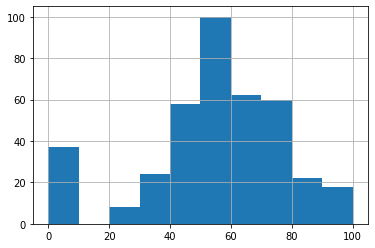

In [19]:
# Начнем с колонки оценки
studs.score.hist()
studs.score.describe()

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


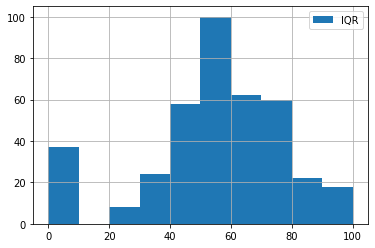

In [20]:
# Подсчитаем границы выбросов по оценкам
median = studs.score.median()
IQR = studs.score.quantile(0.75) - studs.score.quantile(0.25)
perc25 = studs.score.quantile(0.25)
perc75 = studs.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
studs.score.loc[studs.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(
                                                                              label='IQR')

plt.legend()

Все оценки лежат в границах выбросов, значит мы можем продолжить работать со всей выборкой

NormaltestResult(statistic=6.867652860512847, pvalue=0.03226325119850295)

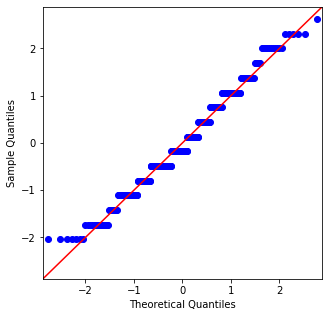

In [21]:
#   Проверим нормальность распределения оценок
fig,ax = plt.subplots(figsize = (5,5))
ax = sm.qqplot(studs.score[studs.score>20],fit = True, line ='45', ax=ax)
stats.normaltest(studs.score[studs.score>20])

In [22]:
stats.normaltest(studs.score[studs.score>20])

NormaltestResult(statistic=6.867652860512847, pvalue=0.03226325119850295)

In [23]:
# Проведём тест Шапиро-Уиллика 
sst.shapiro(studs[studs.score > 0].score)

(0.9814924597740173, 0.0001710323995212093)

 Сошласно тесту данные имеют нормальное распределение.

count    378.000000
mean       7.320106
std       23.615525
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

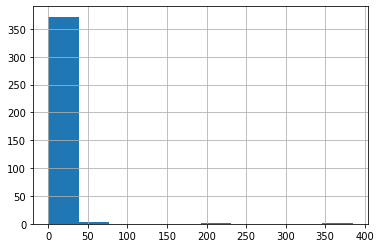

In [24]:
# Рассмотрим колонку absences
studs.absences.hist()
studs.absences.describe()

In [25]:
studs.absences.value_counts(dropna = False) 

0.0      110
2.0       60
4.0       52
6.0       30
8.0       20
10.0      17
12.0      12
14.0      12
NaN       11
16.0       7
3.0        7
7.0        6
5.0        5
18.0       5
20.0       4
1.0        3
22.0       3
9.0        3
13.0       2
15.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

In [26]:
# Заменим  пропуски медианным значением
med = studs['absences'].median()
studs['absences'] = studs['absences'].fillna(med)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


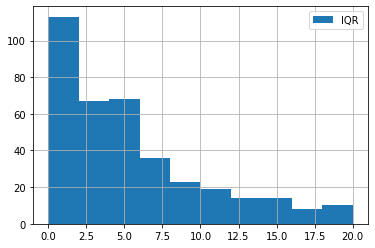

In [27]:
# Подсчитаем границы выбросов по пропускам
median = studs.absences.median()
IQR = studs.absences.quantile(0.75) - studs.absences.quantile(0.25)
perc25 = studs.absences.quantile(0.25)
perc75 = studs.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
studs.absences.loc[studs.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(
                                                                              label='IQR')

plt.legend()

In [28]:
# Удалим строчки содержащие выбросы, значения absences более 20
studs= studs.drop(studs[studs.absences > 20].index)

count    372.000000
mean       4.591398
std        4.915977
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

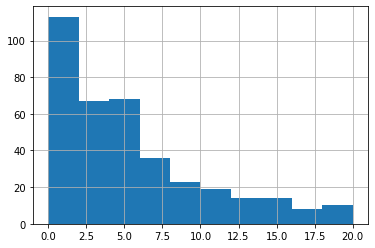

In [29]:
studs.absences.hist()
studs.absences.describe()

NormaltestResult(statistic=5.216396986398042, pvalue=0.0736671361409285)

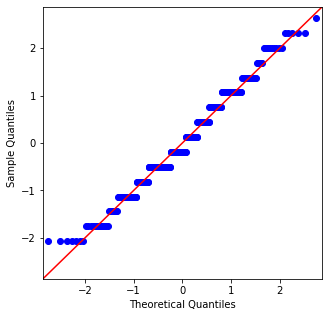

In [30]:
fig,ax = plt.subplots(figsize = (5,5))
ax = sm.qqplot(studs.score[studs.score>0],fit = True, line ='45', ax=ax)
stats.normaltest(studs.score[studs.score>0])

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


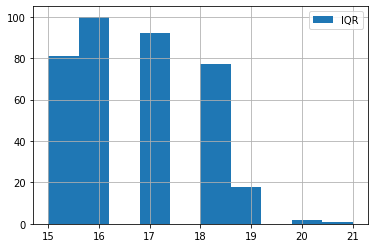

In [31]:
# Подсчитаем границы выбросов по возросту
median = studs.age.median()
IQR = studs.age.quantile(0.75) - studs.age.quantile(0.25)
perc25 = studs.age.quantile(0.25)
perc75 = studs.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
studs.age.loc[studs.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(
                                                                              label='IQR')

plt.legend()

In [32]:
 studs.age.value_counts(dropna = False)

16    100
17     92
15     81
18     77
19     18
20      2
22      1
21      1
Name: age, dtype: int64

Согласно подсчётам граница выбросов по возросту 21 год, у нас максимальное значение 22 года, в даном случае допустимо расширить диапозон выбросов и не уодолять значения  более 21, пропуски отсутствуют.

In [33]:
# Построим матрицу кореляции для числовых признаков
studs.corr(method ='pearson')

,age,absences,score
age,1.000000,0.153536,-0.163081
absences,0.153536,1.000000,0.078401
score,-0.163081,0.078401,1.000000


Как видим, полученные значения кореляции не превышают 0.3, что указывает на слабую силу связи (согласно шкале Чеддока)

### 3. Оценим количество уникальных значений для номинативных переменных, внесем недостающие данные

In [34]:
studs.school.value_counts(dropna = False)   

GP    328
MS     44
Name: school, dtype: int64

In [35]:
studs.studytime.value_counts(dropna = False)   

2.0    178
1.0     99
3.0     61
4.0     27
NaN      7
Name: studytime, dtype: int64

In [36]:
studs.traveltime.value_counts(dropna = False) 

1.0    230
2.0     86
NaN     28
3.0     21
4.0      7
Name: traveltime, dtype: int64

In [37]:
studs.famrel.value_counts(dropna = False)

 4.0    170
 5.0     94
 3.0     58
 NaN     26
 2.0     16
 1.0      7
-1.0      1
Name: famrel, dtype: int64

Из описания следует  что значение -1 явно ошибочное. Заменим его на 1

In [38]:
studs.famrel = studs.famrel.replace(-1, 1)
studs.famrel.value_counts(dropna = False)

4.0    170
5.0     94
3.0     58
NaN     26
2.0     16
1.0      8
Name: famrel, dtype: int64

In [39]:
studs.famrel.value_counts(dropna = False)

4.0    170
5.0     94
3.0     58
NaN     26
2.0     16
1.0      8
Name: famrel, dtype: int64

In [40]:
studs.freetime.value_counts(dropna = False) 

3.0    147
4.0    108
2.0     59
5.0     36
1.0     15
NaN      7
Name: freetime, dtype: int64

In [41]:
studs.goout.value_counts(dropna = False)  

3.0    122
2.0     97
4.0     76
5.0     49
1.0     21
NaN      7
Name: goout, dtype: int64

In [42]:
studs.Medu.value_counts(dropna = False)

4.0    124
2.0     96
3.0     90
1.0     56
NaN      3
0.0      3
Name: Medu, dtype: int64

In [43]:
studs.Fedu.value_counts(dropna = False)   

2.0     100
3.0      87
4.0      84
1.0      75
NaN      23
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [44]:
studs.health.value_counts(dropna = False)   

5.0    132
3.0     84
4.0     58
1.0     44
2.0     39
NaN     15
Name: health, dtype: int64

In [45]:
# Заменим все пропуски (NaN) на моду
studs_non_numeric = studs.select_dtypes(exclude=[np.number])
non_numeric_cols = studs_non_numeric.columns.values
for col in non_numeric_cols:
    missing = studs[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # Выбипаем колонки с NaN
        print('imputing missing values for: {}'.format(col))
        studs['{}_ismissing'.format(col)] = missing
        
        top = studs[col].describe()['top'] # Меняем NaN на моду
        studs[col] = studs[col].fillna(top)

imputing missing values for: address
imputing missing values for: famsize
imputing missing values for: Pstatus
imputing missing values for: Medu
imputing missing values for: Fedu
imputing missing values for: Mjob
imputing missing values for: Fjob
imputing missing values for: reason
imputing missing values for: guardian
imputing missing values for: traveltime
imputing missing values for: studytime
imputing missing values for: failures
imputing missing values for: famrel
imputing missing values for: freetime
imputing missing values for: goout
imputing missing values for: health


In [46]:
def get_stat_dif(column):
    cols = studs.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(studs.loc[studs.loc[:, column] == comb[0], 'score'], 
                        studs.loc[studs.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [47]:
for col in ["traveltime", "studytime", "famrel", "freetime", "goout", "Medu", "Fedu", "health", 
            'failures', 'sex', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


# Выводы
Данные по оценкам имеют нормальное распределение, что говорит о чистоте собранных данных.

В данных достаточно мало пустых значений, максимальное число пропусков не превышает 10 %, колонки famsup, paid.

Выбросы найденны только дла колонки absences (пропуски занятий).

Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это Medu, failures, sex, paid, higher, romantic.
 
Для числовых признаков не была найдена значимая кореляция с целевым признаком score